### В данной домашней работе Вам предстоит отработать следующие 2 навыка: работа с пропущенными значениями и анализ выбросов.

In [204]:

import pandas as pd

data = pd.read_csv('Data/processed_data_with_new_features.csv', index_col='id', sep=',')

In [205]:
data

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,NaN,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,NaN,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id2376096,1,NaN,0,1.226296,6.658011,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
id1049543,0,930.399753,0,6.056935,6.486161,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
id2304944,1,930.399753,0,7.832952,6.639876,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [206]:
data.describe()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
count,1.458644e+06,1.312780e+06,1.458644e+06,1.312780e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,...,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,5.349503e-01,9.594822e+02,5.515396e-03,3.444829e+00,6.466978e+00,1.129816e-03,6.909431e-02,1.389983e-01,1.440626e-01,1.498474e-01,...,6.191230e-02,5.763709e-02,5.771456e-02,5.518276e-02,4.784238e-02,1.633709e-01,1.756350e-01,1.725198e-01,1.703548e-01,1.606396e-01
std,4.987772e-01,4.794109e+01,7.406066e-02,4.316456e+00,7.957595e-01,3.359376e-02,2.536145e-01,3.459448e-01,3.511533e-01,3.569219e-01,...,2.409963e-01,2.330560e-01,2.332030e-01,2.283367e-01,2.134327e-01,3.697039e-01,3.805095e-01,3.778317e-01,3.759443e-01,3.671983e-01
min,0.000000e+00,1.966667e+01,0.000000e+00,0.000000e+00,6.931472e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,9.303998e+02,0.000000e+00,1.232599e+00,5.986452e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,9.303998e+02,0.000000e+00,2.095699e+00,6.496775e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,1.005458e+03,0.000000e+00,3.879873e+00,6.981006e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.718433e+03,1.000000e+00,1.243018e+03,1.507575e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [207]:
data.dtypes

vendor_id               int64
passenger_count       float64
store_and_fwd_flag      int64
distance_km           float64
log_trip_duration     float64
anomaly                 int64
traffic_jam             int64
day_of_week_1           int64
day_of_week_2           int64
day_of_week_3           int64
day_of_week_4           int64
day_of_week_5           int64
day_of_week_6           int64
hour_1                  int64
hour_2                  int64
hour_3                  int64
hour_4                  int64
hour_5                  int64
hour_6                  int64
hour_7                  int64
hour_8                  int64
hour_9                  int64
hour_10                 int64
hour_11                 int64
hour_12                 int64
hour_13                 int64
hour_14                 int64
hour_15                 int64
hour_16                 int64
hour_17                 int64
hour_18                 int64
hour_19                 int64
hour_20                 int64
hour_21   

In [208]:
data.isna().sum()

vendor_id                  0
passenger_count       145864
store_and_fwd_flag         0
distance_km           145864
log_trip_duration          0
anomaly                    0
traffic_jam                0
day_of_week_1              0
day_of_week_2              0
day_of_week_3              0
day_of_week_4              0
day_of_week_5              0
day_of_week_6              0
hour_1                     0
hour_2                     0
hour_3                     0
hour_4                     0
hour_5                     0
hour_6                     0
hour_7                     0
hour_8                     0
hour_9                     0
hour_10                    0
hour_11                    0
hour_12                    0
hour_13                    0
hour_14                    0
hour_15                    0
hour_16                    0
hour_17                    0
hour_18                    0
hour_19                    0
hour_20                    0
hour_21                    0
hour_22       

<Axes: >

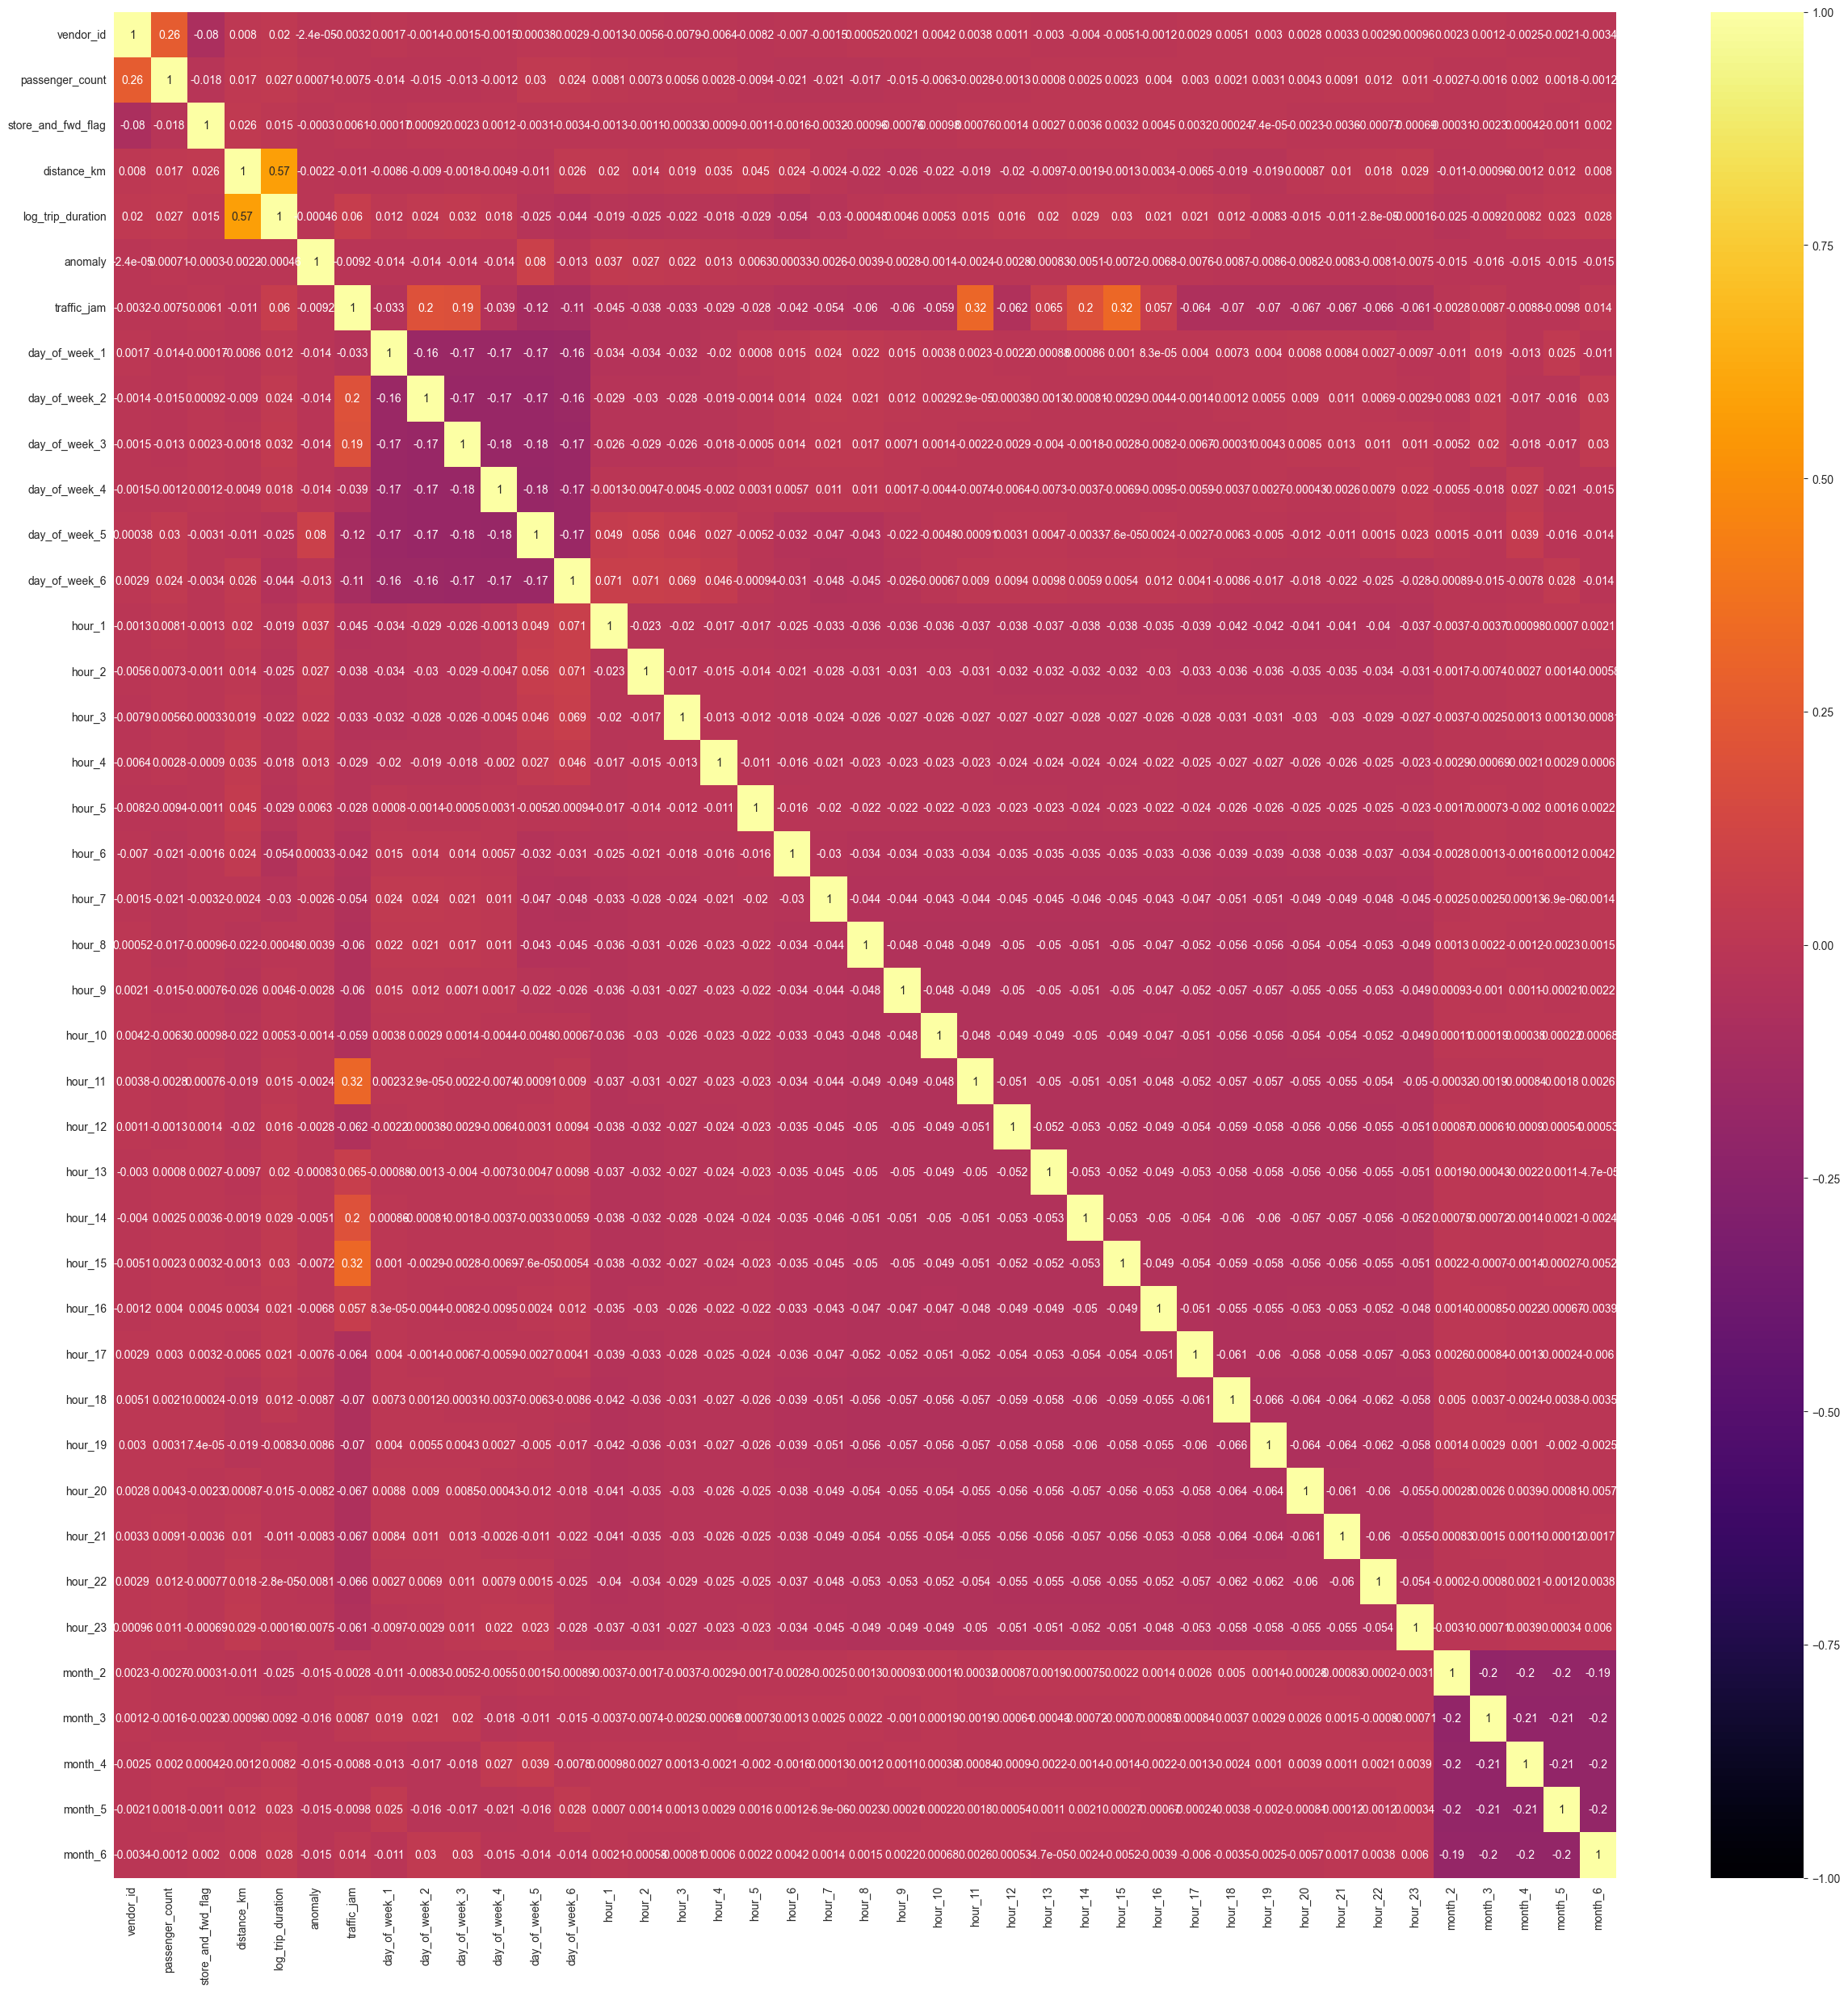

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), cmap='inferno', annot=True, vmin=-1, vmax=1)

In [210]:
import numpy as np

np.linalg.matrix_rank(data.dropna()), data.shape[1]

(41, 41)

In [211]:
data.nunique()

vendor_id                   2
passenger_count            10
store_and_fwd_flag          2
distance_km           1304461
log_trip_duration        7417
anomaly                     2
traffic_jam                 2
day_of_week_1               2
day_of_week_2               2
day_of_week_3               2
day_of_week_4               2
day_of_week_5               2
day_of_week_6               2
hour_1                      2
hour_2                      2
hour_3                      2
hour_4                      2
hour_5                      2
hour_6                      2
hour_7                      2
hour_8                      2
hour_9                      2
hour_10                     2
hour_11                     2
hour_12                     2
hour_13                     2
hour_14                     2
hour_15                     2
hour_16                     2
hour_17                     2
hour_18                     2
hour_19                     2
hour_20                     2
hour_21   

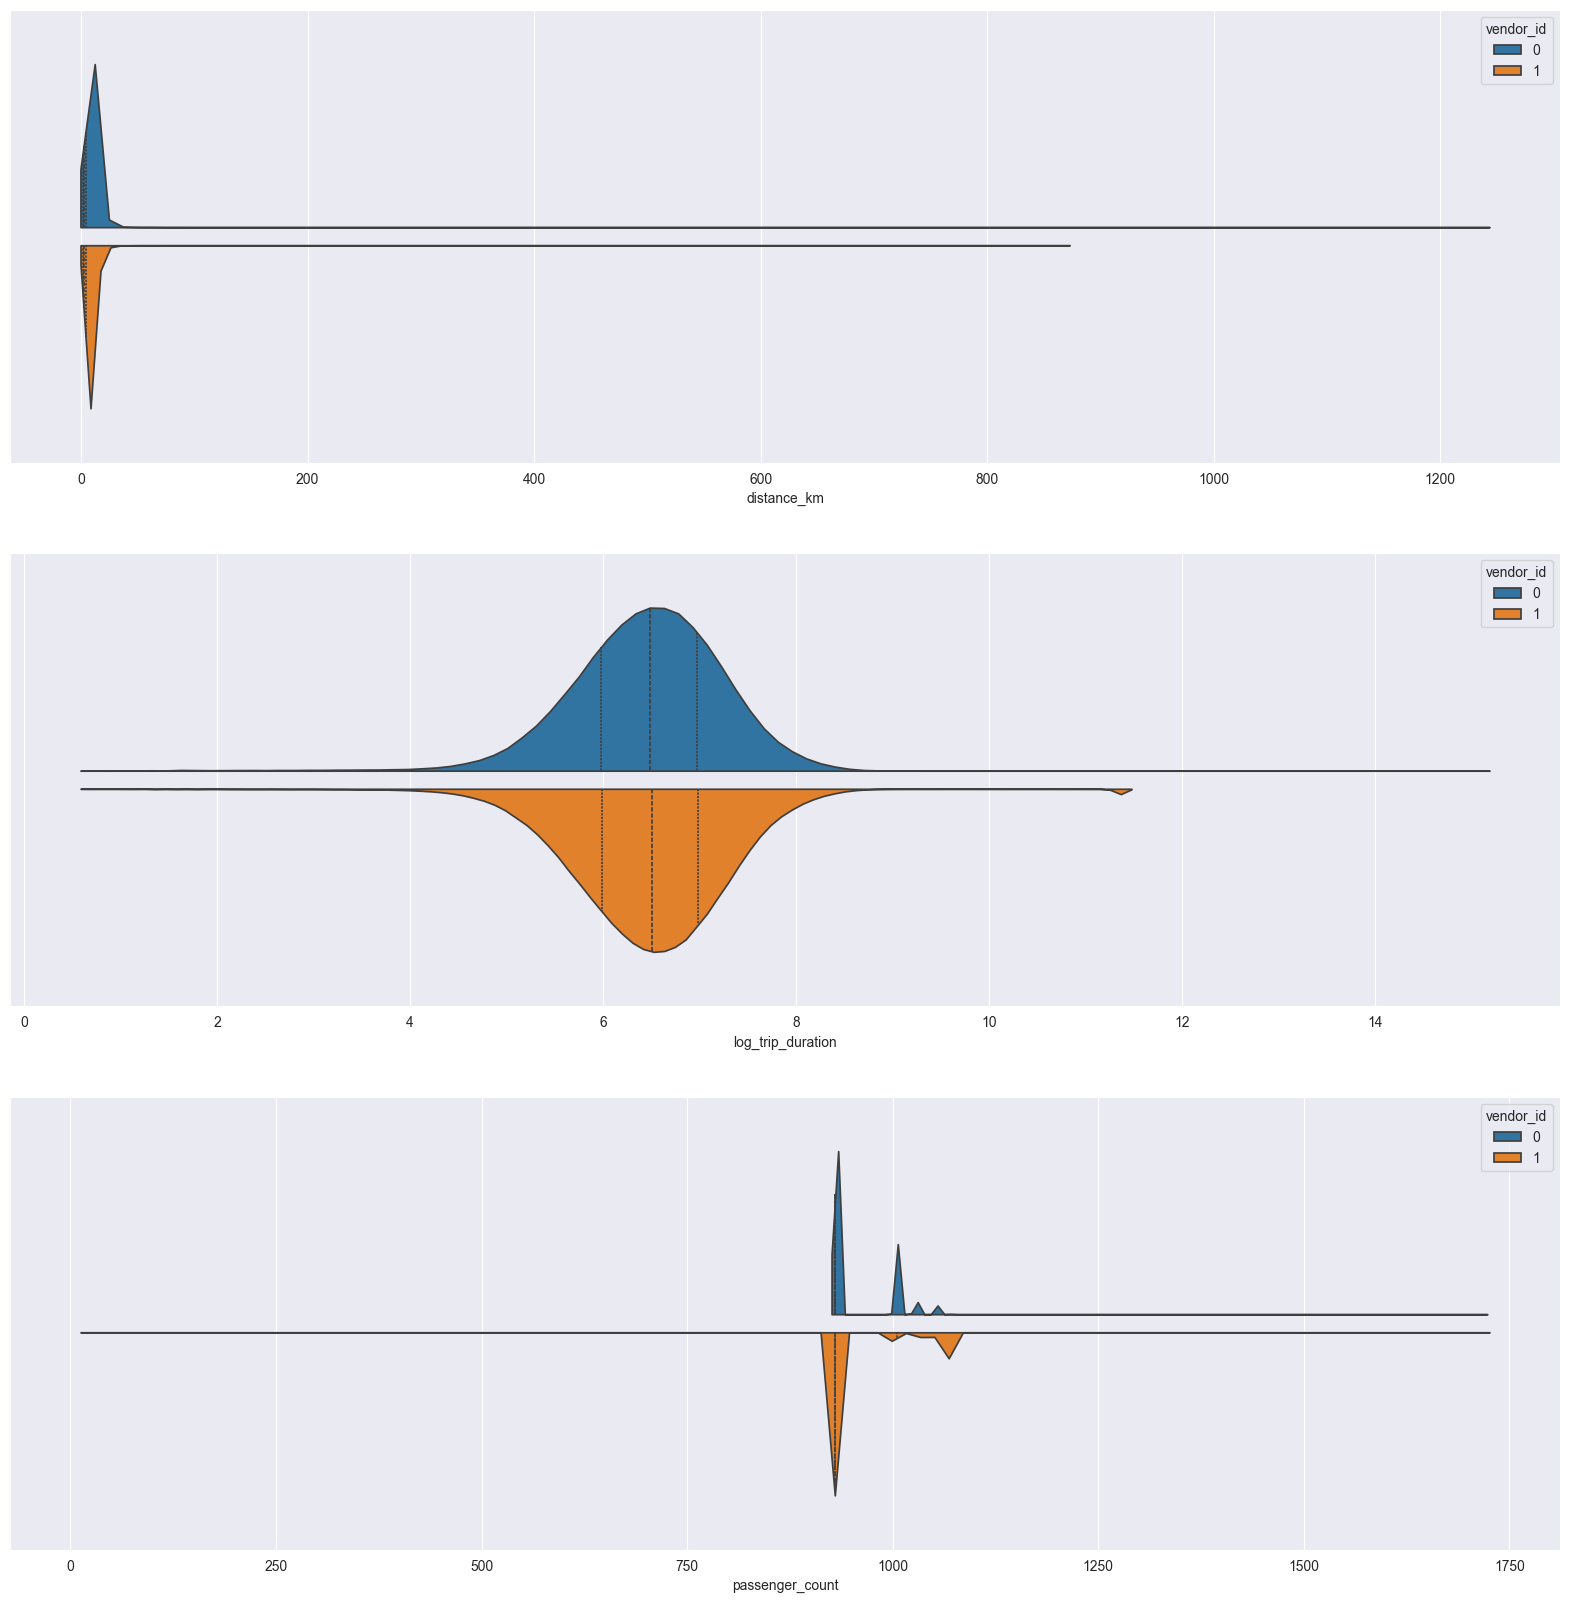

In [212]:
fig, ax = plt.subplots(3, 1)
fig.set_size_inches((20, 20))
for column, id in zip(data[['distance_km', 'log_trip_duration', 'passenger_count']].columns, range(0, 3)):
    sns.violinplot(ax=ax[id], data=data,
                   x=column, hue='vendor_id',
                   inner='quartile',
                   split=True, gap=.1)

Никудышный гном случайно пролил кофе на папку с данными и кодом. К несчастью, из-за этого они с братьями потеряли кучу информации в столбиках **passenger_count** и **distance_km**.

In [213]:
### Выведите количество пропусков в данных колонках
### На всякий случай, проверьте целостность данных в остальных

### Your code is here
data.isna().sum()

vendor_id                  0
passenger_count       145864
store_and_fwd_flag         0
distance_km           145864
log_trip_duration          0
anomaly                    0
traffic_jam                0
day_of_week_1              0
day_of_week_2              0
day_of_week_3              0
day_of_week_4              0
day_of_week_5              0
day_of_week_6              0
hour_1                     0
hour_2                     0
hour_3                     0
hour_4                     0
hour_5                     0
hour_6                     0
hour_7                     0
hour_8                     0
hour_9                     0
hour_10                    0
hour_11                    0
hour_12                    0
hour_13                    0
hour_14                    0
hour_15                    0
hour_16                    0
hour_17                    0
hour_18                    0
hour_19                    0
hour_20                    0
hour_21                    0
hour_22       

Начнем с **passenger_count**. Вообще говоря, изначально это была категориальная колонка, к которой мы применили технику OneHotEncoder. Чтобы избавиться от пропусков в данных, конечно, можно просто убрать все объекты, в которых есть пропуски, но тогда мы потеряем ценную информацию. 

Воспользуйтесь относительно простым приемом из лекции: в указанной колонке заполните пропуски самым *популярным* значением среди неотсутствующих.

In [214]:
### Your code is here
data.passenger_count = data.passenger_count.fillna(data.passenger_count.value_counts().index[0].round(2))

С колонкой **distance_km** поступим более интересным способом!

Чтобы заполнить пропуск в данной колонке для того или иного объекта, можно находить наиболее похожий на него объект и подглядывать в его значение **distance_km**. Для того, чтобы понять, насколько объекты похожи друг на друга, необходимо использовать Евклидово расстояние между этими самыми объектами в пространстве всех признаков!

С учетом количества объектов в нашем датасете и признаков, посчитать попарные расстояния будет мега-сложно. Поэтому давайте называть объекты похожими, если они принадлежат одной категории, составленной из следующих колонок:

1. vendor_id
2. store_and_fwd_flag
3. traffic_jam
4. month_2
5. month_3
6. month_4
7. month_5
8. month_6

Внутри каждой группы найдите среднее значение признака **distance_km** и заполните NaN'ы в объектах с пропуском в соответствии с тем, к какой категории относится данный объект. Похожее упражнение мы делали на практике в занятии!

**Hint**: достаточно просто взять group by по указанным выше категориальным колонкам и верно вставить полученный результат в исходную табличку.

P.S. Колонки выбраны случайным образом. Можно было взять и другую комбинацию.

In [215]:
### Your code is here
means = data.groupby(['vendor_id', 'store_and_fwd_flag', 'traffic_jam', 'month_2', 'month_3', 'month_4', 'month_5',
                      'month_6']).distance_km.transform('mean')
data['distance_km'] = data['distance_km'].fillna(means)

In [216]:
### Убедимся, что пропусков не осталось

### Your code is here
data.isna().sum()

data.head(20).to_csv(path_or_buf='Data/task7.csv', sep=';', index=False)

### Теперь наши данные чисты! Замерьте качество модели на Кросс-Валидации

In [217]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

selector = KFold(n_splits=4, shuffle=True, random_state=33)

model = LinearRegression()

result = cross_validate(estimator=model,
                        X=data.drop('log_trip_duration', axis=1),
                        y=data['log_trip_duration'],
                        scoring='neg_mean_squared_error',
                        cv=selector,
                        return_train_score=True)

print(f"MSLE на Кросс-валидации: {round(-result['test_score'].mean(), 3)}")

MSLE на Кросс-валидации: 0.431


### Проведем анализ выбросов! Нарисуйте ящик с усами и гистограмму для таргетной переменной.

<Axes: >

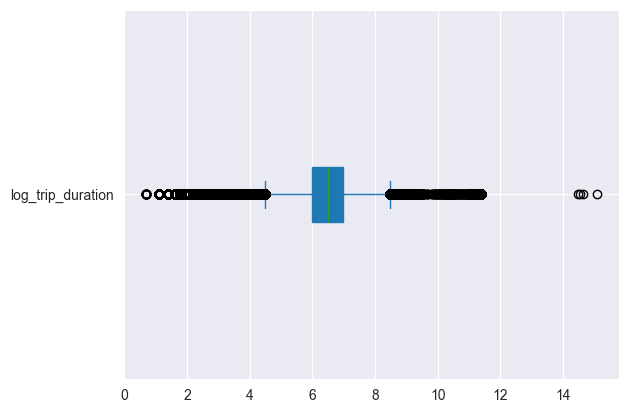

In [218]:
data['log_trip_duration'].plot(kind='box', vert=False, patch_artist=True)

<Axes: ylabel='Frequency'>

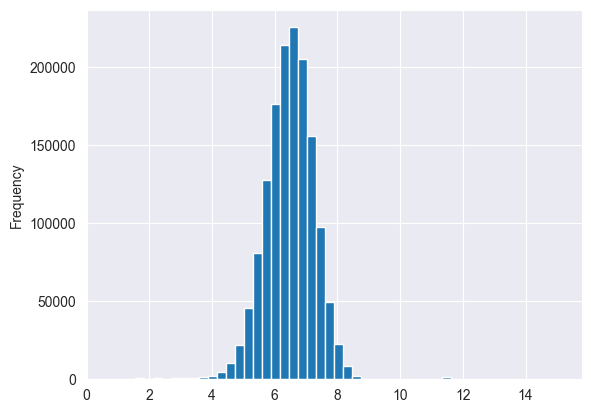

In [219]:
data['log_trip_duration'].plot(kind='hist', bins=50)

Есть ли, на ваш взгляд, в данных выбросы?

Кажется, что да!

Давайте почистим их, удалив те объекты, таргеты которых находятся вне промежутка

(топ 99,5% значение;   топ 0,5% значение)

In [221]:
### Your code is here

bottom = data.log_trip_duration.quantile(0.005)
top = data.log_trip_duration.quantile(0.995)

data = data[data['log_trip_duration'].between(bottom, top, inclusive='neither')]

<Axes: >

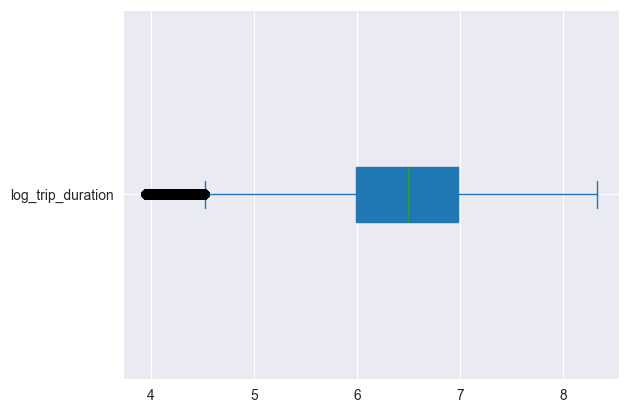

In [222]:
data['log_trip_duration'].plot(kind='box', vert=False, patch_artist=True)

<Axes: ylabel='Frequency'>

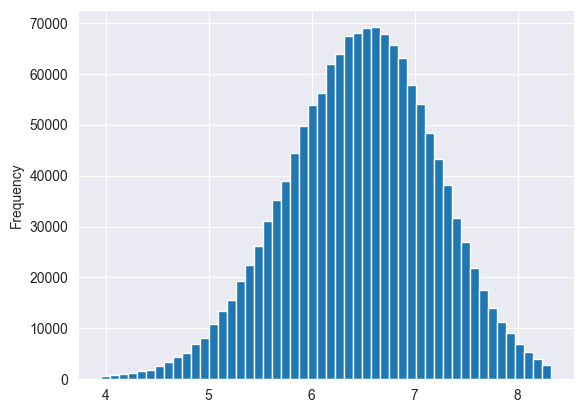

In [223]:
data['log_trip_duration'].plot(kind='hist', bins=50)

Снова замерьте качество на кросс-валидации, используя старый selector

In [224]:
result = cross_validate(estimator=model,
                        X=data.drop('log_trip_duration', axis=1),
                        y=data['log_trip_duration'],
                        scoring='neg_mean_squared_error',
                        cv=selector,
                        return_train_score=True)

print(f"MSLE на Кросс-валидации: {round(-result['test_score'].mean(), 3)}")

MSLE на Кросс-валидации: 0.35
